This notebook demonstrates how torque-limited and collision-free robot trajectories can be learnt using the the safemotions package. <br>
Note: Colab does not provide a display server, however, it is possible to render videos of the generated movements. 
When running the package on your local machine, you can add the command line argument "--use_gui" for instantaneous visualization. 

The robots in the following examples are controlled by neural networks that are trained to reach as many randomly sampled target points as possible.    


In [1]:
# First step: install the safemotions[train] package via pip
! pip install pybullet==3.1.6
! pip install safemotions[train]
! pip install lz4
! pip install gputil
%matplotlib inline
# Use a renderer with hardware acceleration provided that a GPU is available. 
import GPUtil
renderer = "egl" if len(GPUtil.getGPUs()) > 0 else "cpu"
if renderer == "cpu":
  print("Using CPU renderer.")
else:
  print("Using GPU renderer.")

     |████████████████████████████████| 1.8MB 4.3MB/s 
     |████████████████████████████████| 38.2MB 76kB/s 
Using GPU renderer.


Run the following code to render a video in which a single robot attempts to reach target points without touching the table on which it is mounted, a monitor, and four virtual walls around the table. <br>
Note: Since the virtual walls around the robot are transparent, only the GPU-based renderer can be used for this example. <br>
When a robot link flashes  <font color='#ff5400'>orange</font>, an alternative safe behavior is executed to avoid a torque limit violation. <font color='#75052d'>Red</font> and <font color='#0000aa'>blue</font> flashing indicates that an alternative safe behavior is performed to prevent a collision with another robot link and a static obstacle, respectively. 



2021-05-19 14:22:37,891	INFO resource_spec.py:212 -- Starting Ray with 7.28 GiB memory available for workers and up to 3.65 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-05-19 14:22:38,343	INFO services.py:1148 -- View the Ray dashboard at 127.0.0.1:8265
2021-05-19 14:22:38,610	INFO trainer.py:428 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2021-05-19 14:22:38,726	WARNING deprecation.py:30 -- DeprecationWarning: `sample_batch_size` has been deprecated. Use `rollout_fragment_length` instead. This will raise an error in the future!
2021-05-19 14:22:38,729	INFO trainer.py:585 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0

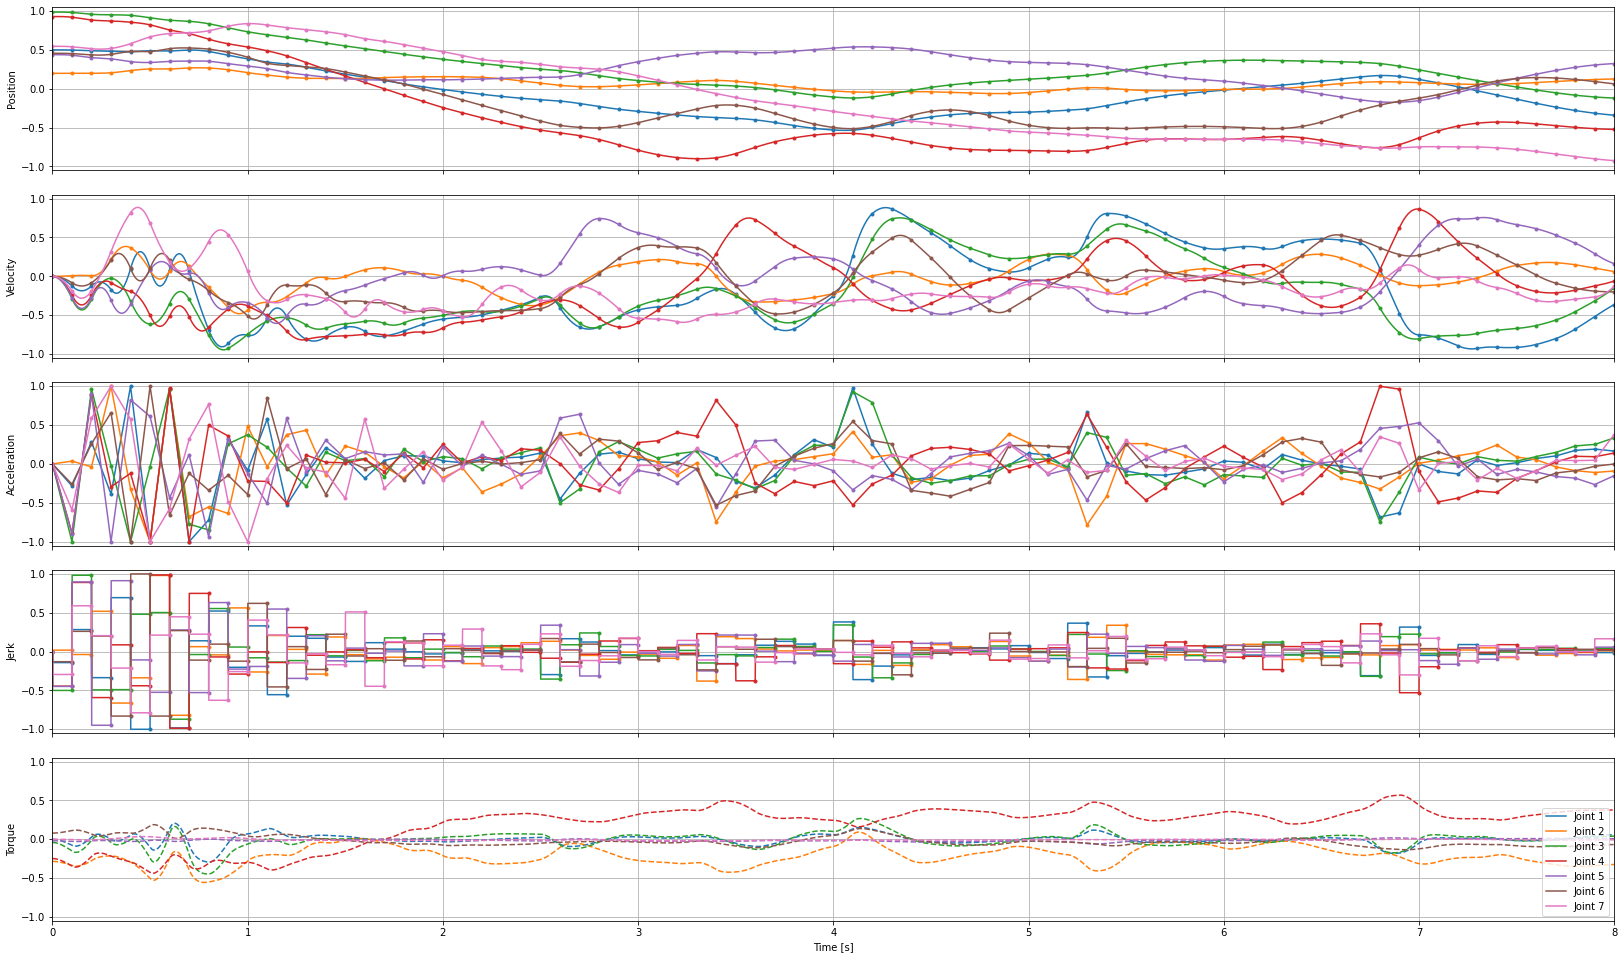

INFO:root:Last episode took 22.50115203857422 seconds
INFO:root:Trajectory duration: 8.0 seconds
INFO:root:Episode reward: 90.8833336631422
INFO:root:Computed 1 episode(s) in 24.136321544647217 seconds.
INFO:root:Mean computation time: 22.50115203857422 seconds, Max computation time: 22.50115203857422 seconds.


In [2]:
import os, safemotions
from IPython.display import HTML, display
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
video_height = 720
video_frame_rate = 24
video_width = int(16/9 * video_height)
evaluate_script = os.path.join(package_dir, "evaluate.py")
if renderer == "cpu":
  print("This example requires a GPU-based renderer as the walls around the robot are transparent. Unfortunately, transparency is not supported by the cpu renderer. Try to run the other examples instead.")
else:
  %run -G "$evaluate_script" --checkpoint=one_robot/P_CT_S_5_J_A --online_trajectory_duration=8.0 --plot_trajectory --plot_actual_torques --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
  video_filename = os.path.join("/content", "episode_1.mp4")
  video_file = open(video_filename,'rb').read()
  url = "data:video/mp4;base64," + b64encode(video_file).decode()
  display(HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url)))

Movements for two robots with alternating target points can be generated by running the code below. The color of each target point indicates the robot to which the target point is assigned. 

2021-05-19 14:28:13,010	ERROR worker.py:682 -- Calling ray.init() again after it has already been called.
2021-05-19 14:28:13,021	WARNING deprecation.py:30 -- DeprecationWarning: `sample_batch_size` has been deprecated. Use `rollout_fragment_length` instead. This will raise an error in the future!
INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619 2.93205973 2.0593951  2.93205973 2.0593951  2.93205973
 2.0593951  3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973
 -2.0593951  -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803 2.44346095
 3.14159265 3.14159265]
INFO:root:Acc limits: [15.   7.5 10.  12.5 15.  20.  20.  15.   7.5 10.  12.5 15.  20.  20. ]
INFO:root:Jerk limits: [300. 150. 200. 250.

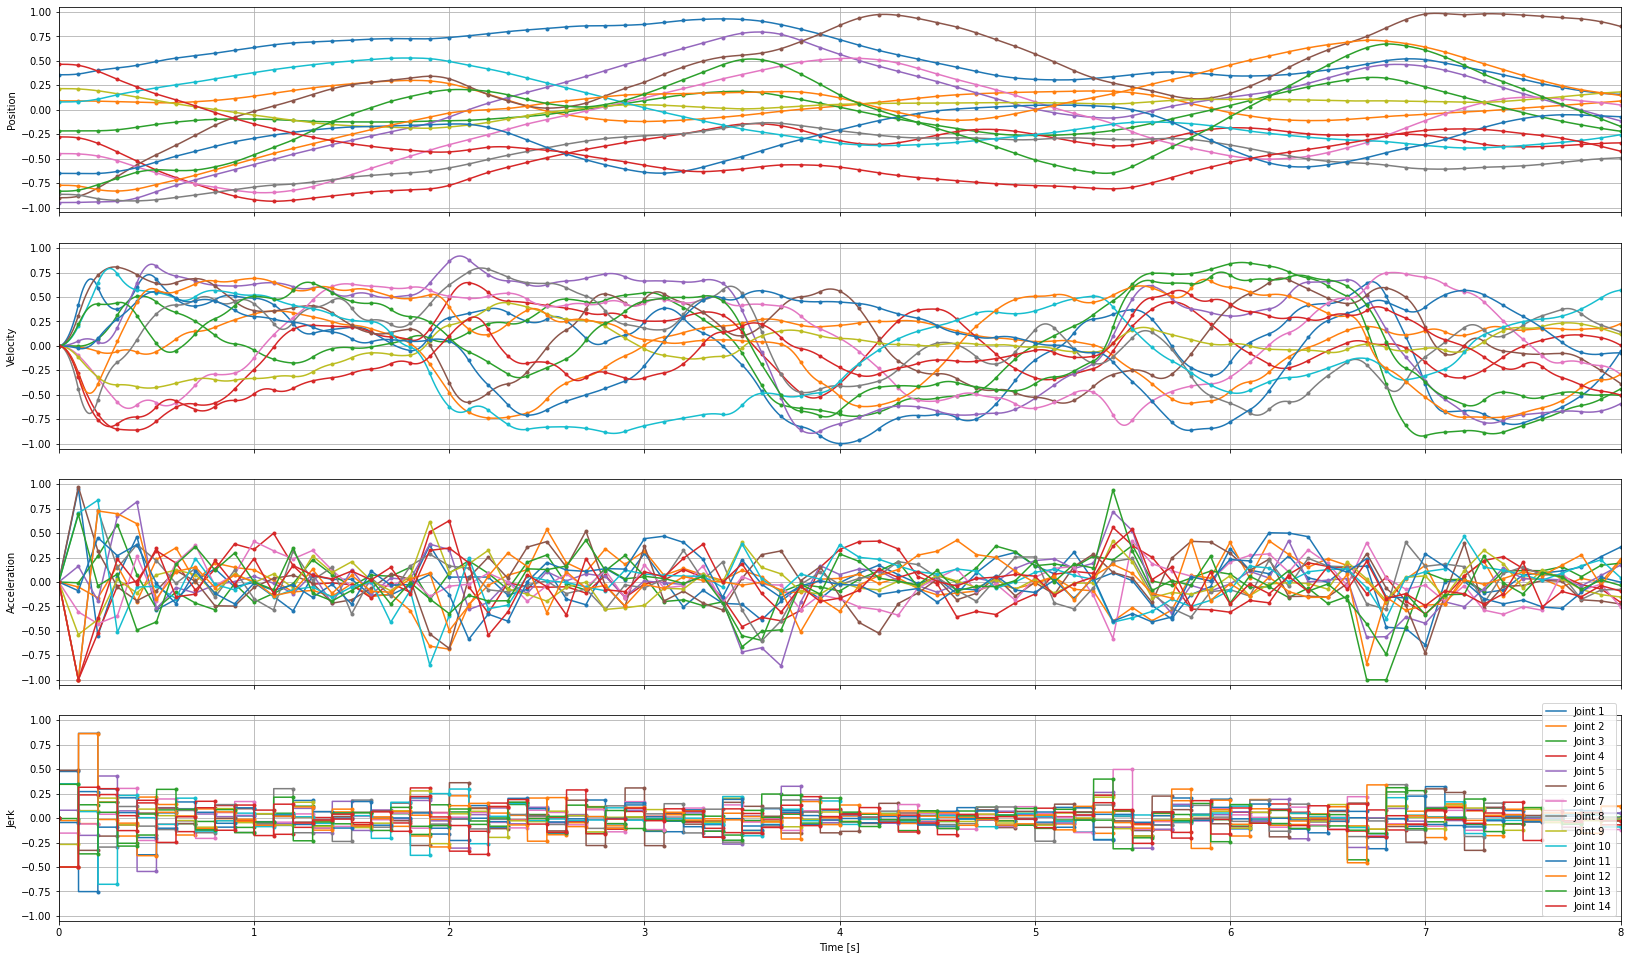

INFO:root:Last episode took 34.658379554748535 seconds
INFO:root:Trajectory duration: 8.0 seconds
INFO:root:Episode reward: 52.42856452787677
INFO:root:Computed 1 episode(s) in 36.96741604804993 seconds.
INFO:root:Mean computation time: 34.658379554748535 seconds, Max computation time: 34.658379554748535 seconds.


In [7]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
evaluate_script = os.path.join(package_dir, "evaluate.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$evaluate_script" --checkpoint=two_robots/P_C_S_1_J_A_D_5_T_A --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

Finally, collision-free trajectories for three robots can be generated by running the following code. Note: Running the cell takes around 85 seconds. 

2021-05-19 14:29:30,494	ERROR worker.py:682 -- Calling ray.init() again after it has already been called.
2021-05-19 14:29:30,505	WARNING deprecation.py:30 -- DeprecationWarning: `sample_batch_size` has been deprecated. Use `rollout_fragment_length` instead. This will raise an error in the future!
INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619 2.93205973 2.0593951  2.93205973 2.0593951  2.93205973
 2.0593951  3.01932619 2.93205973 2.0593951  2.93205973 2.0593951
 2.93205973 2.0593951  3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973
 -2.0593951  -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -2.93205973 -2.0593951  -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803 2.44346095


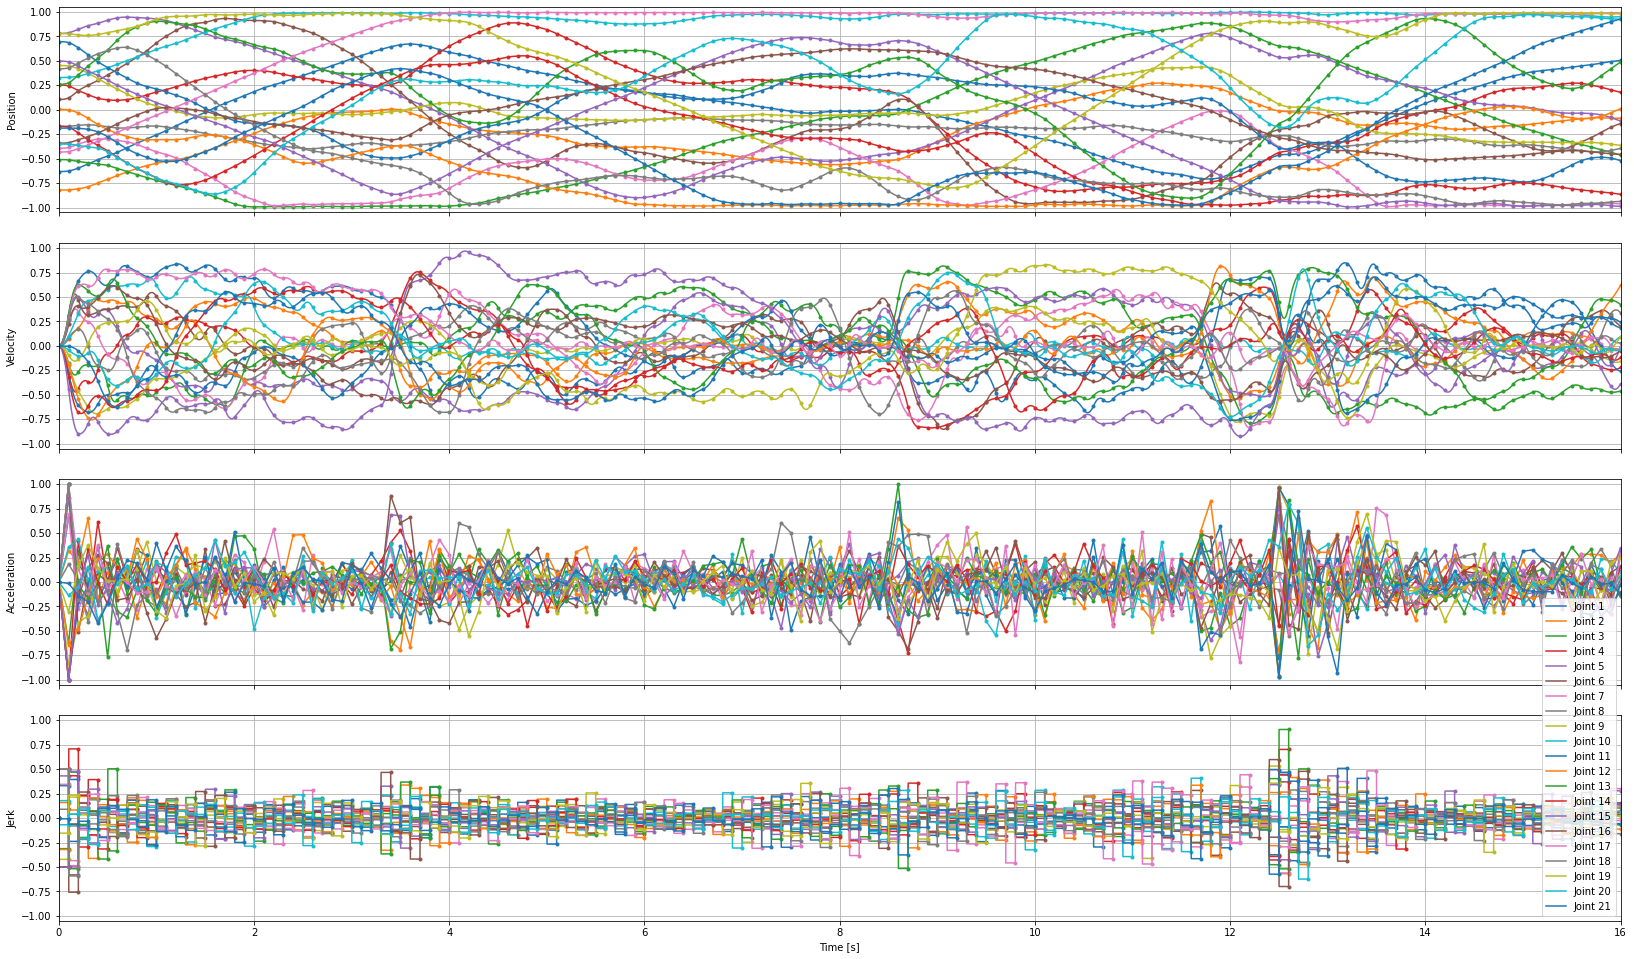

INFO:root:Last episode took 83.80327320098877 seconds
INFO:root:Trajectory duration: 16.0 seconds
INFO:root:Episode reward: 53.91940033769858
INFO:root:Computed 1 episode(s) in 86.47578358650208 seconds.
INFO:root:Mean computation time: 83.80327320098877 seconds, Max computation time: 83.80327320098877 seconds.


In [8]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
evaluate_script = os.path.join(package_dir, "evaluate.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$evaluate_script" --checkpoint=three_robots/P_C_S_1_J_A_D_5_T_A --online_trajectory_duration=16.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))